_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösungen zu Übung 06 - Allgemein: Histogramme und Zeitreihen
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
--- 
Da die letzte Übung etwas lang war, wiederholen wir den Teil über die Histogramme aus der letzten Übung hier noch einmal. Außerdem erkunden wir den Datensatz weiter und versuchen, dem Unterschied zwischen normalen Usern, Trollen und Trum anhand von Histogrammen näher zu kommen. Schlussendlich sehen wir uns den zeitlichen Verlauf verschiedener Größen an, um Trends aus dem Datensatz mit politischen Entwicklungen zu verknüpfen. 

Die aktuelle Übung gliedert sich in zwei Teile:

* [Histogramme](#histogramme)
* [Wie unterscheiden sich die User?](#user_unterschied)
* [Zeitreihen](#zeitreihen)

**WICHTIG**: bevor du mit dem Bearbeiten dieser Übung anfängst, stelle sicher, dass die Datensätze 
* ```tweets_normal_bereinigt.csv```,
* ```tweets_trump_bereinigt.csv``` und
* ```tweets_troll_bereinigt.csv```  
im Ordner ```data``` liegen. Diese Datensätze werden im Verlauf von Übung 05 erzeugt. 

<a name="histogramme"></a>1. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, die gewonnenen Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

In [5]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

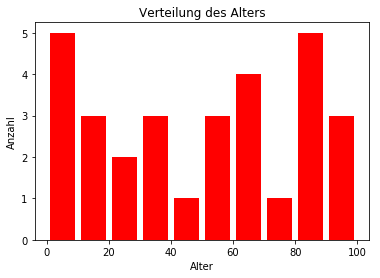

In [6]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters');

### Aufgaben
Zur Vorbereitung laden wir die gesäuberten Datensätze, die wir in Übung 05 abgespeichert haben:

In [25]:
# mit der Funktion "join()" können wir Pfade im Dateisystem sicher handhaben
from os.path import join

# die Bibliothek pandas liefert das DataFrame
import pandas as pd

tweets_normal = pd.read_csv(join('data','tweets_normal_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_trump = pd.read_csv(join('data','tweets_trump_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_troll = pd.read_csv(join('data','tweets_troll_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')

**A.** Erstelle ein Histogramm der Tweet-Längen der Troll-Accounts. 

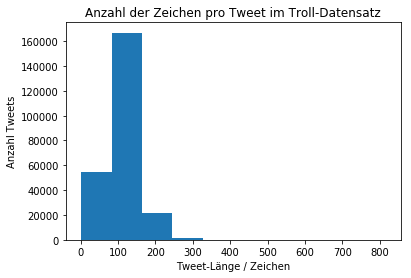

In [26]:
# erstelle ein einfaches Histogram der Tweet-Länge der Troll-Accounts
plt.hist(tweets_troll['tweet_length'])

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  

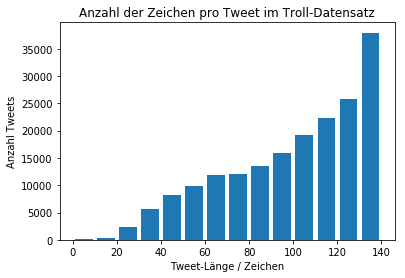

In [27]:
# die Werte liegen alle in einem Bereich von 0 bis 140 Zeichen.
# Indem wir die "range" entsprechend festlegen und die Anzahl der Bins
# auf 14 setzen, liegen die einzelnen Bins zwischen "glatten" Vielfachen
# von 10. Das ist anschaulich in einfach zu interpretieren. Diese 
# Darstellung lässt z.B. direkt ablesen, dass die meisten Tweets
# zwischen 130 und 140 Zeichen haben. Allerdings geht auch etwas 
# information verloren

# die rwidth auf einen Wert kleiner 1.0 zu setzen ist auch eine gute Idee,
# da es die einzelen bins in der Darstellung besser voneinander abgrenzt.

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=14, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

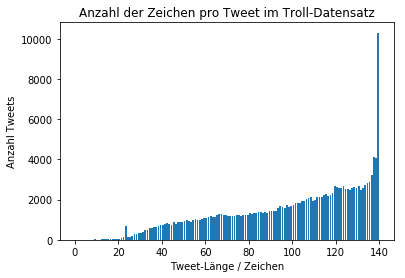

In [28]:
# stellen wir das Histogramm besser aufgelöst - nämlich mit einem
# bin je Zeichen - dar, dann wird deutlich, dass es eine extreme
# Häufung von Tweet-Längen bei 140 Zeichen gibt.

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen Datensatz?  

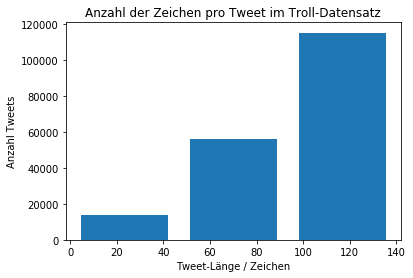

In [29]:
# hier geht (wie schon oben beschrieben) viel Information verloren

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=3, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

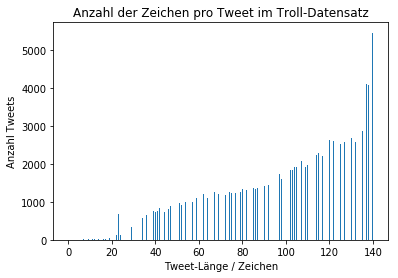

In [30]:
# hier geht der Vorteil der Aggregierten Information verloren. Insbesondere
# ergibt diese Darstellung wenig Sinn, da es nur ganzzahlige Tweetlängen
# geben kann. Entsprechend ist die maximal sinnvolle Anzahl von Bins bei
# einer maximalen Tweet-Länge von 140 Zeichen bins=140.

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=500, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

**D. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

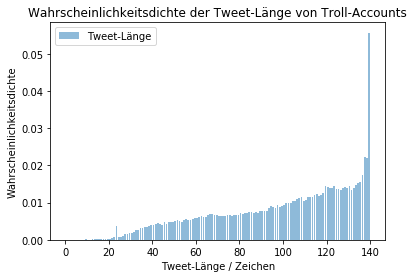

In [31]:
# das Argument "density" verändert die Darstellung der Beobachtungen auf der y-Achse. 
# Vorher war die absolute Anzahl der Beobachtungen abgebildet, mit density=True
# wird die normierte Anzahl der beobachtungen abgebildet, die als Wahrscheinlichkeits-
# dichte interpretiert werden kann

# Histogramm
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8, \
         alpha=0.5, label='Tweet-Länge', density=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Wahrscheinlichkeitsdichte der Tweet-Länge von Troll-Accounts');

# Legende
plt.legend();

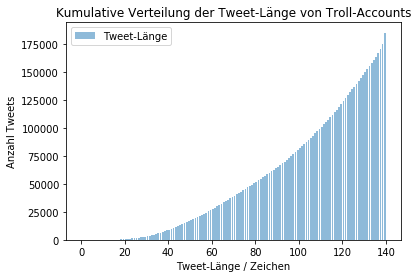

In [32]:
# wenn cumulative=True, dann zeigt jeder bin nicht nur die Anzahl der Beobachtungen
# in ebendiesem bin sondern die Anzahl in dem bin PLUS die Anzahl der Beobachtungen
# in allen Vorangegangenen bins. Die Anzahl der Beobachtungen im letzten Bin entspricht
# also immer der Gesamtanzahl der Beobachtungen.

# Histogramm 
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8, \
         alpha=0.5, label='Tweet-Länge', cumulative=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Kumulative Verteilung der Tweet-Länge von Troll-Accounts');

# Legende
plt.legend();

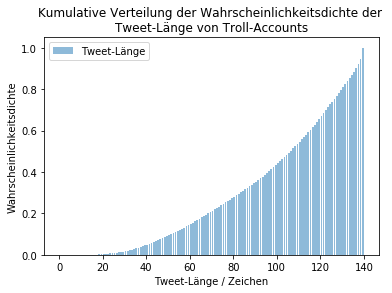

In [33]:
# ist sowohl density=True als auch cumulative=True, dann lässt sich schön beobachten,
# dass die Wahrscheinlichkeitsdichte auf 1 normiert ist, dass heißt die kumulierten 
# Wahrscheinlichkeiten, eine Beobachtung in einem Bin zu finden ist im letzten bin gleich 1

# Histogramm
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8, \
         alpha=0.5, label='Tweet-Länge', cumulative=True, density=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Kumulative Verteilung der Wahrscheinlichkeitsdichte der \nTweet-Länge von Troll-Accounts');

# Legende
plt.legend();

[Anfang](#top)

<a name="user_unterschied"></a>2. Wie unterscheiden sich die User?
---

**A.** Visualisiere die Länge der Tweets von normalen Usern, Trollen und Trump in einem Histogram. Wähle ```bins``` und ```range``` so, dass die in den Daten steckende Information deutlich wird. Was fällt dir auf? Worauf musst du achten, damit die beiden Histogramme vergleichbar sind? Achte auf Achsenbeschriftungen, Titel und Legende der Abbildung. <font color='green'>**HINWEIS:** Um die drei Datensätze vergleichbar zu machen, bietet sich das Argument ```density=True``` an. Du kannst einfach in der selben Code-Zelle mehrfach hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Alternativ kannst du der Funktion auch eine Liste von Listen als Argument mitgeben. Dann werden die Balken der verschiedenen Datensätze _nebeneinander_ statt übereinander dargestellt. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font>   


_Um die Anzahl der Tweets mit einer bestimmten Länge vergleichbar zu machen benutzen wir hier das Argument "density=True". Damit werden die Anzahlen "normalisiert" (also durch die Gesamtanzahl der Tweets in einem Datensatz geteilt). Darüber hinaus können wir der Funktion plot() statt einer einzelnen Liste mit Werten auch eine Liste von Listen übergeben. Die Balken der verschiedenen Datensätze werden dann nebeneinander dargestellt. Das selbe gilt für das Argument "label", dem wir dann entsprechend  eine Liste mit Labels übergeben müssen._

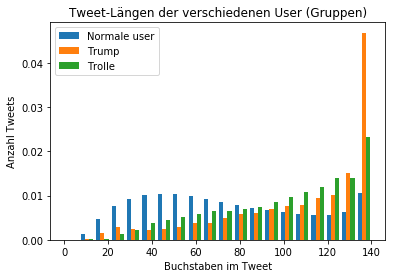

In [34]:
plt.hist([tweets_normal['tweet_length'],\
          tweets_trump['tweet_length'],\
          tweets_troll['tweet_length']],bins=20,density=True,\
          label=['Normale user', 'Trump', 'Trolle'], rwidth=0.8, range=[0,140])

# Beschriftungen
plt.title('Tweet-Längen der verschiedenen User (Gruppen)')
plt.xlabel('Buchstaben im Tweet')
plt.ylabel('Anzahl Tweets')

plt.legend()

**B.** Was fällt dir an der Visualisierung auf? Verhalten sich die verschiedenen User (Gruppen) unterschiedlich? Was ist die mittlere Tweet-Länge für die normalen User, Trolle und Trump? Was der Median?   

_Die drei User (Gruppen) verhalten sich Stark unterschiedlich:_
* _Donald Trump hat sehr viele Tweets mit exakt 140 Zeichen abgesetzt, was der maximal erlaubten Tweet-Länge entspricht. Das spricht dafür, dass er sich entweder sehr viele Gedanken um die optimale Tweet-Länge hat, oder aber einen professionellen Social Media Manager engagiert._
* _Die Tweet-Länge der normalen User hat ein Maximum bei etwa 45 Zeichen. Das könnte in etwa der Länge eines Satzes entsprechen (hier könnte man auch noch einmal eine genauere Analyse machen und nachsehen, wieviele Sätze ein Tweet enthält). Außerdem gibt es ein zweites Maximum bei 140 Zeichen, was dafür spricht, dass zumindest ein Teil der User einen Teil ihrer Tweets auf 140 Zeichen optimiert._
* _Die Tweetlänge der Trolle steigt linear an und hat ein etwas ausgeprägteres Maximum bei 140 Zeichen als die normalen User. Insgesamt unterscheidet sich die Verteilung der Tweet-Längen der Trolle doch sehr stark von der Verteilung der normalen User. Das könnte darauf hindeuten, dass die Tweets der Trolle von Algorithmen erzeugt werden._

In [35]:
for dataset, name in zip([tweets_normal, tweets_trump, tweets_troll],\
                         ['normale User', 'Trump', 'Trolle']):
    print('Die Mittlere Tweet-Länge für {} ist {:1.2f} Zeichen'\
          .format(name, dataset['tweet_length'].mean()))
    
    print('Der Median der Tweet-Länge für {} ist {:1.2f} Zeichen'\
          .format(name, dataset['tweet_length'].median()))
    
    print()

Die Mittlere Tweet-Länge für normale User ist 74.09 Zeichen
Der Median der Tweet-Länge für normale User ist 69.00 Zeichen

Die Mittlere Tweet-Länge für Trump ist 111.13 Zeichen
Der Median der Tweet-Länge für Trump ist 123.00 Zeichen

Die Mittlere Tweet-Länge für Trolle ist 115.31 Zeichen
Der Median der Tweet-Länge für Trolle ist 120.00 Zeichen




**C.** Visualisiere nur die Tweets der normalen User in einem Histogram. Wähle die maximale Anzahl an Zeichen, die in einem Tweet erlaubt sind als Anzahl der Bins und setze ```range=[0,140]```. Visualisiere Mittelwert und Median als Linien in der Abbildung.

Linien in einer Abbildung lassen sich wie folgt zeichnen:

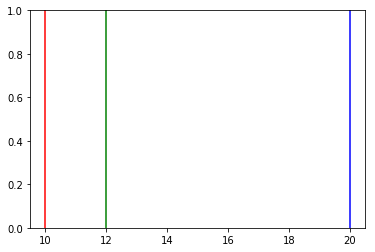

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axvline(x=10, color='red')
plt.axvline(x=12, color='green')
plt.axvline(x=20, color='blue')

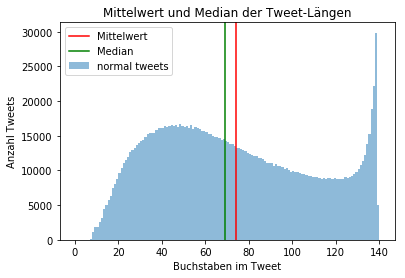

In [37]:
# Histogramm der Tweets der normalen User
plt.hist(tweets_normal['tweet_length'],bins=140,\
         label='normal tweets', rwidth=1, range=[0,140], alpha=0.5)

# berechne Mittelwert und Median
mittelwert = tweets_normal['tweet_length'].mean()
median = tweets_normal['tweet_length'].median()

# plotte zwei vertikale Linien, jeweils an Position x, die
# Mittelwert und Median darstellen
plt.axvline(x = mittelwert, color='red', label='Mittelwert')
plt.axvline(x = median, color='green', label='Median')

# Beschriftungen
plt.title('Mittelwert und Median der Tweet-Längen')
plt.xlabel('Buchstaben im Tweet')
plt.ylabel('Anzahl Tweets')
plt.legend()

[Anfang](#top)

<a name="zeitreihen"></a>3. Zeitreihen
---
Um eine Zeitentwicklung in unserem Datensatz zu veranschaulichen, müssen wir dem Datensatz erst einmal Information über die Zeit entlocken. Dafür wandeln wir die Information zu Zeit und Datum in einen zeitlichen _Abstand_ zum ersten Post um. Wenn also der erste Post im Datensatz zur Stunde 0 erfolgt, dann hat ein Post der einen Tag und 5 Stunden später erfolg ist einen Abstand von 29 Stunden zum ersten Post. Um das zu bewerkstelligen, bedienen wir uns des Moduls ```datetime``` das uns ein ```datetime```-Objekt zur Verfügung stellt (siehe Lösung zu Übung 05 **3.D**). Dieses Objekt hat die Funktion ```strptime()```, der wir den String mit Datum und Uhrzeit sowie Information zur Formatierung des Strings übergeben können. Wir bekommen ein ```Datetime```-Objekt zurück, mit dem sich rechnen lässt. Das heißt, verschiedene ```datetime```-Objekte lassen sich voneinander abziehen oder addieren um Zeitabstände zu erhalten:

In [38]:
# zur Erinnerung: so sieht die aktuell gespeicherte Information
# zu Datum und Uhrzeit aus
print(tweets_trump['Date'].head())

0    2009-05-20 22:29:00
1    2010-11-29 15:52:00
2    2010-10-28 18:53:00
3    2010-11-24 17:20:00
4    2009-11-16 21:06:00
Name: Date, dtype: object


In [39]:
# importiere das datetime objekt aus dem modul datetime
from datetime import datetime

# das ist das Format des Strings mit der Zeitinformation, also
# Jahr-Monat-Tag Stunde:Minute:Sekunde
fmt = '%Y-%m-%d %H:%M:%S'

# wir verwandeln die Einträge der Spalte 'Date' in datetime-Objekte
tweets_trump['Date_new'] = [datetime.strptime(date, fmt) for date in tweets_trump['Date']]

In [40]:
# die Information sieht immer noch gleich aus
print(tweets_trump.loc[0]['Date_new'])

# aber jetzt können wir mit ihr rechnen!
print(tweets_trump.loc[1]['Date_new'] - tweets_trump.loc[0]['Date_new'])

2009-05-20 22:29:00
557 days 17:23:00


Wir fügen eine neue Spalte zum DataFrame hinzu, die den zeitlichen Abstand jedes Tweets zum frühesten Tweet enthält. Mit der Funktion ```total_seconds()``` konvertieren wir den Zeitabstand in die Anzahl der Sekunden.

In [41]:
# berechnen der Zeitabstände
zeitabstand = [(date - tweets_trump['Date_new'].min()).total_seconds() for date in tweets_trump['Date_new']]

# Hinzufügen der Spalte
tweets_trump['timedelta'] = zeitabstand

# bei genauerem Nachdenken stellt sich die Darstellung in Sekunden als
# nicht so praktikabel heraus, deswegen teilen wir noch einmal durch
# 60 (Sekunden) mal 60 (Minuten), um den Zeitabstand in Stunden anzugeben
tweets_trump['timedelta'] = tweets_trump['timedelta'] / (60*60)

In [42]:
# aktuell sind die Werte noch nicht sortiert
tweets_trump.head()

,Date,User,Tweet,Length,tweet_length,word_number,Date_new,timedelta
0,2009-05-20 22:29:00,realDonaldTrump,Read a great interview with Donald Trump that ...,112,112,16,2009-05-20 22:29:00,387.583333
1,2010-11-29 15:52:00,realDonaldTrump,Congratulations to Evan Lysacek for being nomi...,127,127,23,2010-11-29 15:52:00,13772.966667
2,2010-10-28 18:53:00,realDonaldTrump,I was on The View this morning. We talked abou...,139,139,23,2010-10-28 18:53:00,13007.983333
3,2010-11-24 17:20:00,realDonaldTrump,Tomorrow night's episode of The Apprentice del...,140,140,23,2010-11-24 17:20:00,13654.433333
4,2009-11-16 21:06:00,realDonaldTrump,Donald Trump Partners with TV1 on New Reality ...,116,116,14,2009-11-16 21:06:00,4706.200000


In [43]:
# deswegen sortieren wir die Tabelle anhand der Spalte "timedelta"
tweets_trump.sort_values('timedelta',inplace=True)

Mit der Funktion ```plot(x, y)``` der Bibliothek ```matplotlib.pyplot``` können wir ein Liniendiagram erstellen, indem wir der Funktion zwei Listen mit Werten auf der x- und y- Achse geben:

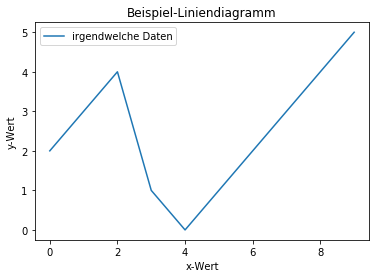

In [44]:
# importiere die Bibliothek mit dem Kürzel "plt"
import matplotlib.pyplot as plt
%matplotlib inline

# erstelle zwei Listen mit Datenpunkten für die 
# x-Achse und y-Achse
x = range(10)
y = [2,3,4,1,0,1,2,3,4,5]

# plotte das Liniendiagramm
plt.plot(x,y, label='irgendwelche Daten')

# Achsenbeschriftungen, Titel und Legende funktionieren
# genau gleich wie für Histogramme
plt.xlabel('x-Wert')
plt.ylabel('y-Wert')
plt.title('Beispiel-Liniendiagramm')
plt.legend()

### Aufgaben
**A.** Was ist das Datum und die Uhrzeit des frühesten und spätesten Tweets im Datensatz?  

In [45]:
print('Ältester Tweet: {}'.format(tweets_trump['Date_new'].min()))
print('Jüngster Tweet: {}'.format(tweets_trump['Date_new'].max()))

Ältester Tweet: 2009-05-04 18:54:00
Jüngster Tweet: 2018-01-12 13:48:00


**B.** Erstelle ein Liniendiagramm der Tweet-Länge über der Zeit. Vergiss dabei nicht die Achsenbeschriftungen etc. Wie entwickelt sich die Tweet-Länge in der Zeit bevor Trump seine Kandidatur bekannt gibt? Wie danach? Wie kannst du dir die plötzlichen Sprünge in der Tweet-Länge erklären?  

Text(0,0.5,'tweet length / characters')

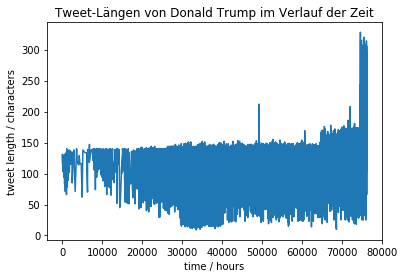

In [46]:
# in der Spalte 'timedelta' ist die Zeit (in Stunden) seit dem
# erstem Tweet angegeben. Plotte die Tweet-Länge über der Zeit:
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

**C.** Mit den Funktionen ```plt.xlim(xmin, xmax)``` kannst du den Bereich auf der x-Achse einschränken, der im Diagramm angezeigt wird. Benutze diese Funktion, um dir kleinere Zeiträume genauer anzusehen.   

Text(0,0.5,'tweet length / characters')

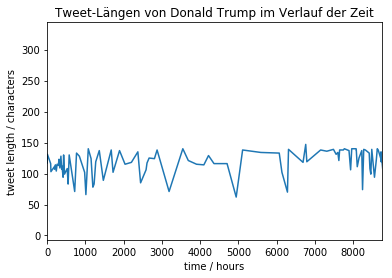

In [47]:
# Tweets im ersten Jahr
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

year = 24*365 # ein Tag hat 24 Stunden, ein Jahr 365 Tage
plt.xlim(0, year)

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

Text(0,0.5,'tweet length / characters')

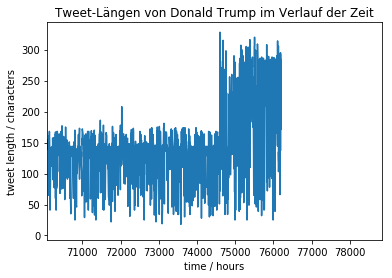

In [48]:
# Tweets im letzten Jahr
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

year = 24*365 # ein Tag hat 24 Stunden, ein Jahr 365 Tage
plt.xlim(8 * year, 9 * year)

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

Text(0,0.5,'tweet length / characters')

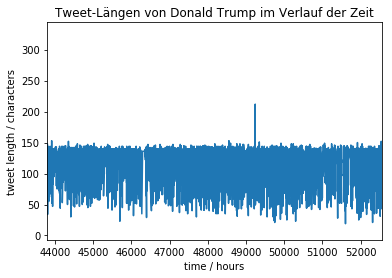

In [49]:
# Tweets im sechsten Jahr
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

year = 24*365 # ein Tag hat 24 Stunden, ein Jahr 365 Tage
plt.xlim(5 * year, 6 * year)

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

Um in dem Trump-Datensatz besser nach Jahren filtern zu können, fügen wir eine Spalte mit der Jahreszahl hinzu:

In [50]:
# das können wir so einfach tun, da die in der Spalte "Date" gespeicherten
# datetime-Objekte ein Attribut .year haben, das uns direkten Zugriff auf das
# Jahr gibt (ähnlich übrigens mit Monat und Tag).
tweets_trump['year'] = [date.year for date in tweets_trump['Date_new']]

**D.** Berechne für die einzelnen Jahre die Mittlere Tweet-Länge und die mittlere Anzahl der Worte pro Tweet. Visualisiere alle Größen über den Verlauf der Jahre. <font color='green'>**HINWEIS:** Den mittleren Zeitlichen Abstand zwischen Tweets musst du erst aus dem Datums- und Uhrzeitangaben berechnen. </font> Was siehst du und wie lässt sich die Abbildung interpretieren?  

In [51]:
# der betrachtete Zeitraum
zeitraum = list(range(2009, 2018))

# leere Listen, die wir gleich füllen werden
mean_tweet_length = []
mean_word_number = []

# iteriere über den Zeitraum
for year in zeitraum:
    maske_year = tweets_trump['year'] == year
    tweets_trump_year = tweets_trump[maske_year]
    mean_tweet_length.append(tweets_trump_year['tweet_length'].mean())
    mean_word_number.append(tweets_trump_year['word_number'].mean())

Text(0.5,0,'Jahr')

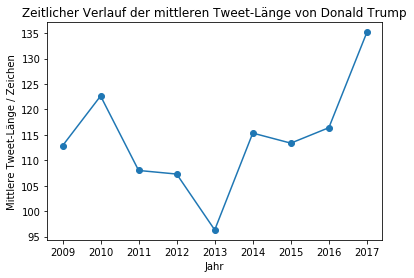

In [52]:
# Visualisierung des zeitlichen Verlaufs der mittleren Tweet-Länge
plt.plot(zeitraum, mean_tweet_length, '-o', label='Tweets von Donald Trump')

# Beschriftungen
plt.title('Zeitlicher Verlauf der mittleren Tweet-Länge von Donald Trump')
plt.ylabel('Mittlere Tweet-Länge / Zeichen')
plt.xlabel('Jahr')

Text(0.5,0,'Jahr')

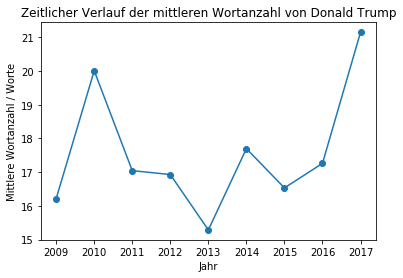

In [53]:
# Visualisierung des zeitlichen Verlaufs der mittleren Wortanzahl
plt.plot(zeitraum, mean_word_number, '-o', label='Tweets von Donald Trump')

# Beschriftungen
plt.title('Zeitlicher Verlauf der mittleren Wortanzahl von Donald Trump')
plt.ylabel('Mittlere Wortanzahl / Worte')
plt.xlabel('Jahr')

* _Die mittlere Tweet-Länge und die mittlere Anzahl der Worte verlaufen beide fast gleich: es gibt ein ausgeprägtes Minimum im Jahr 2013, im Jahr 2017 erreicht die mittlere Tweet-Länge ein Maximum von 135 bzw. die mittlere Wortanzahl ein Maximum von 21 Worten je Tweet._

**E.** Auch die Funktion ```plot()``` hat viele verschiedene Argumente, mit denen man ihr Verhalten modifizieren kann. Mache dich mit der Dokumentation der Funktion vertraut und probiere ein paar Argumente aus, um die Abbildung zu verändern. Versuche insbesondere, die Darstellung der Linie zu verändern: aktuell ist die Linie einfach nur eine Linie. Möglich sind aber auch Punkte oder Striche. Was eignet sich für unsere Daten am besten und warum?  

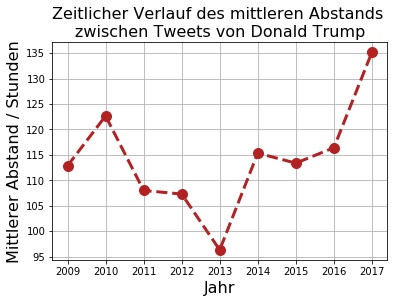

In [56]:
# Dokumentation der Funktion plot(): 
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

# die Farbe können wir mit "color" anpassen. Als Argument übergeben
# wir entweder eine der vielen bekannten Farbname wie "red" oder "green"
# oder aber RGB-Werte
# mit "linewidth" passen wir die Dicke der Linie an
# mit "markersize" die Größe der Punkte
# der String "--o" gibt das Format der Line an: in diesem Fall
# eine gestrichelte Line mit Punkten wo Daten vorliegen
plt.plot(zeitraum, mean_tweet_length, '--o', color='FireBrick',\
         linewidth=3, markersize=10, label='Tweets von Donald Trump')

# hiermit schalten wir ein Gitter im Hintergrund des Plots zu
plt.grid()

# Beschriftungen, diesmal mit größerer Schriftgröße
plt.title('Zeitlicher Verlauf des mittleren Abstands \nzwischen Tweets von Donald Trump',fontsize=16)
plt.ylabel('Mittlerer Abstand / Stunden', fontsize=16)
plt.xlabel('Jahr',fontsize=16);

**F. (optional)** Rechne den zeitlichen Abstand zwischen den aufeinander folgenden Tweets aus und füge ihn als eine neuen Spalte zum DataFrame hinzu. Wieviele Tweets pro Stunde hat Trump über den gesamten betrachteten Zeitraum in etwa abgesetzt? Was ist der Median des Zeitabstandes? Wie interpretierst du die Diskrepanz zwischen Mittelwert und Median?  

In [57]:
# Wir machen uns zunutze, dass die Tweets a) schon sortiert nach Zeitpunkten 
# vorliegen und b) wir mit den Datetime-Objekten sehr einfach rechnen 
# (sie voneinander abziehen) können.

# Liste, in der wir die Zeiträume speichern werden. An erster Stelle der Liste 
# steht eine Null, da der zeitliche Abstand des ersten Tweets zum vorangegangenen
# Tweet nicht definiert ist
gaps = [0]

# iteriere über alle Tweets (minus dem ersten)
for index in range(1,len(tweets_trump)):
    # berechne den Zeitlichen Abstand zwischen einem Tweet mit
    # Index i und dem vorangegangenen Tweet mit Index i - 1
    gap = tweets_trump.loc[index]['timedelta'] - tweets_trump.loc[index - 1]['timedelta']
    # füge den errechneten Zeitabstand der Liste hinzu
    gaps.append(gap)
    
# füge die Liste dem DataFrame hinzu
tweets_trump['time_gap'] = gaps

In [58]:
mean_abstand = tweets_trump['time_gap'].mean()
median_abstand = tweets_trump['time_gap'].median()

print('Der mittlere Abstand zwischen zwei Tweets ist {:1.2f} Stunden'\
      .format(mean_abstand))
print('Trump hat über den gesamten Zeitraum {:1.2f} Tweets pro Stunde abgesetzt.'\
      .format(1 / mean_abstand))
print('Der Median des zeitlichen Abstands zwischen zwei Tweets ist {:1.2f} Stunden.'\
      .format(median_abstand))

Der mittlere Abstand zwischen zwei Tweets ist 1.98 Stunden
Trump hat über den gesamten Zeitraum 0.51 Tweets pro Stunde abgesetzt.
Der Median des zeitlichen Abstands zwischen zwei Tweets ist -0.07 Stunden.


* _In den frühen Jahren liegen oft sehr große Zeitabstände zwischen den Tweets, die den Mittelwert nach oben ziehen. Später hat der Account Trumps sehr viele Tweets in sehr kurzem Abstand abgesetzt, was den vergleichsweise niedrigeren Median von 0.18 Stunden bzw. etwa 11 Minuten erklärt._

**G. (optional)** Errechne den Mittelwert und Median des Zeitabstands zwischen den Tweets für jedes einzelne Jahr im Datensatz. Visualisiere den zeitlichen Verlauf des Mittelwerts und Medians über die Jahre in einem Liniendiagramm. Vergiss nicht auf Achsenbeschriftungen etc.

In [59]:
# der betrachtete Zeitraum
zeitraum = list(range(2009, 2018))

# leere Listen, die wir gleich füllen werden
mean_time_gap = []
median_time_gap = []

# iteriere über den Zeitraum
for year in zeitraum:
    maske_year = tweets_trump['year'] == year
    tweets_trump_year = tweets_trump[maske_year]
    mean_time_gap.append(tweets_trump_year['time_gap'].mean())
    median_time_gap.append(tweets_trump_year['time_gap'].median())

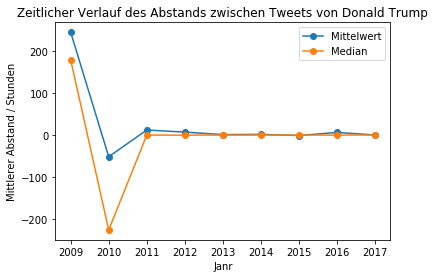

In [60]:
# Visualisierung des zeitlichen Verlaufs des mittleren Abstandes zwischen zwei Tweets
plt.plot(zeitraum, mean_time_gap, '-o', label='Mittelwert')
plt.plot(zeitraum, median_time_gap, '-o', label='Median')

# Beschriftungen
plt.title('Zeitlicher Verlauf des Abstands zwischen Tweets von Donald Trump')
plt.ylabel('Mittlerer Abstand / Stunden')
plt.xlabel('Janr')
plt.legend()

* _Der mittlere zeitliche Abstand zwischen Tweets sinkt von etwa 100 STunden im Jahr 2009 auf etwa eine Stunde im Jahr 2012 und bleibt dann relativ konstant auf diesem Wert. Anscheinend hat Trump in der Zeit zwischen 2009 und 2012 Twitter kennen und lieben gelernt (oder einen Social Media Manager eingestellt...). Der Median folgt dem selben Trend und fällt für die späteren Jahre praktisch genau mit dem Mittelwert zusammen._

 **H. (optional)** Visualisiere die Zeitabstände in einem Histogram. Zeichne eine Linie bei 7 Stunden ein (wir nehmen einmal an, das ist in etwa die Zeit, die ein Mensch schläft). Kannst du aus der Visualisierung entnehmen, ob Donald Trump schläft?

Text(0.5,1,'Zeitlicher Abstand zwischen Tweets')

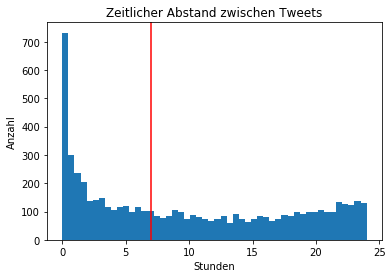

In [61]:
# Visualisierung: wir visualisieren nur den Bereich zwischen 
# 0 und 24 Stunden, um einen besseren Überblick über die 
# kleineren Zeitabstände zu bekommen
plt.hist(tweets_trump['time_gap'].dropna(),range=[0,24],bins=50)
# zeichne eine Linie ein
plt.axvline(x=7, color='red')
# Beschriftungen
plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Zeitlicher Abstand zwischen Tweets')

Text(0.5,1,'Zeitlicher Abstand zwischen Tweets')

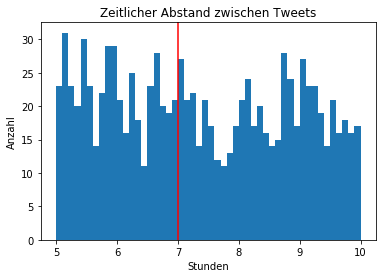

In [62]:
# Zoom in den Bereich 5-10 Stunden, um die Verteilung dort noch
# genauer anzusehen
plt.hist(tweets_trump['time_gap'].dropna(),range=[5,10],bins=50)
# zeichne eine Linie ein
plt.axvline(x=7, color='red')
# Beschriftungen
plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Zeitlicher Abstand zwischen Tweets')

In [63]:
# wieviele Zeitabstände liegen zwischen 5 und 10 Stunden?
len(tweets_trump[(tweets_trump['time_gap'] > 5) & (tweets_trump['time_gap'] < 10)])

1006

* _Es gibt kein Anzeichen für eine Häufung der Abstände um die 7 Stunden Marke. Da der Datensatz 8 Jahre und damit 8*365 = 2920 Nächte enthält, würden wir zumindest einige tausend "durchgeschlafene" Nächte erwarten. Der Datensatz enthält mit 1463 aber nur etwa halb so viele Zeitabstände zwischen 5 und 10 Stunden. Das deutet darauf hin, dass entweder mehr als eine Person Trumps Account betreut, oder aber er häufig nicht durchschläft und twittert._ 

[Anfang](#top)